# <font color=black> Figures - brain or spinal cord icaps </font>
<hr style="border:1px solid black">

In [1]:
import sys,json
import glob
import pandas as pd
import numpy as np
import nibabel as nib
import seaborn as sns
import os 
from matplotlib import pyplot as plt

#sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')
sys.path.append('/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/')

from plotting import Plotting
from plotting import Plot_brain

from spine_only_analysis import SpineOnlyAnalysis
from compute_similarity import compute_similarity
%matplotlib inline
%load_ext autoreload
%autoreload 2

<hr style="border:1px solid black">

# Initialization

### Load configuration file 

In [2]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../../config/config_ICAP_ICA_brsc.json') as config_file:
    config = json.load(config_file)
    
#with open('../config/config_spine_only_CL.json') as config_file:
#    config = json.load(config_file)
    

<hr style="border:1px solid black">

# Figure 2A – Brain 

# Figure 2B spinal cord ICAPS

Sorting method: rostrocaudal (max value)
The plotting will be displayed in neurological orientation (Left > Right)
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project///iCAP/results_brsc_project/young/figures/Indiv_spinalcord_mtl_icap_7_group_thr2to4.png


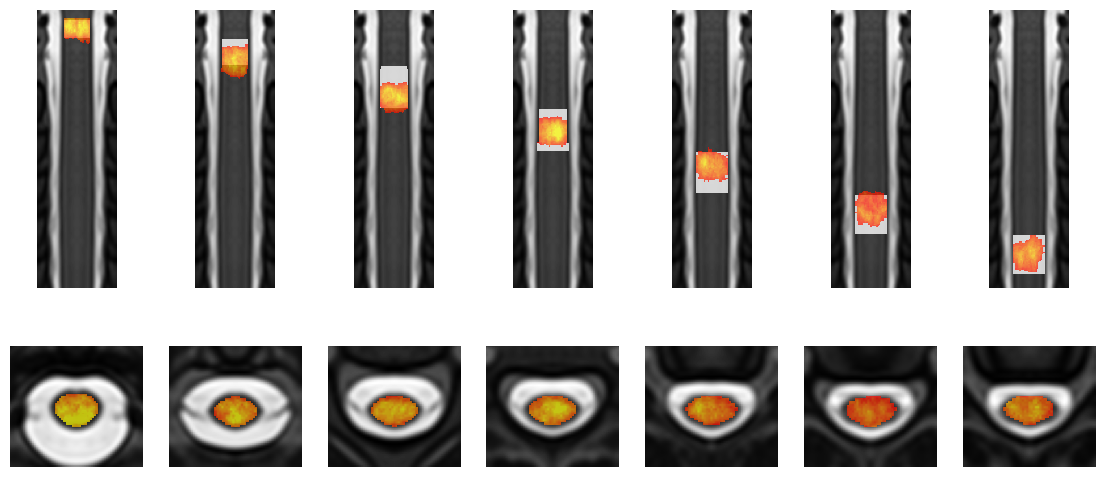

In [3]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_icap = {'k':7, 'dataset':'mtl', 'analysis':'icap', 'lthresh':2}

plotting_icap = Plotting(config,'spinalcord',params1=params_icap)
plotting_icap.sc_plot(show_spinal_levels=True, k_per_line=7, lthresh=2, uthresh=4,save_results=True, similarity_method='Dice',centering_method='middle',plot_overlap=False)    


_Note: the component numbers refer to the ones of the original datasets (i.e., before any type of reordering)_

/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//iCAP/results_brsc_project/young/spinalcord//K_7/comp_zscored/*iCAPs_z
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//hc_project_analyses/masks/spinalcord/levels/frostell/spinal_levels//K_7/comp_zscored/*C1toC7.nii.gz
METHOD 1: Comparing two sets of components at specific K values 
mtl_icap at K = 7 vs atlas_icap at K = 7 

Sorting method: rostrocaudal (max value)
[0.86299179 0.68134784 0.70992723 0.86371775 0.85649932 0.89659053
 0.93496748]
The mean similarity is 0.83 ± 0.1


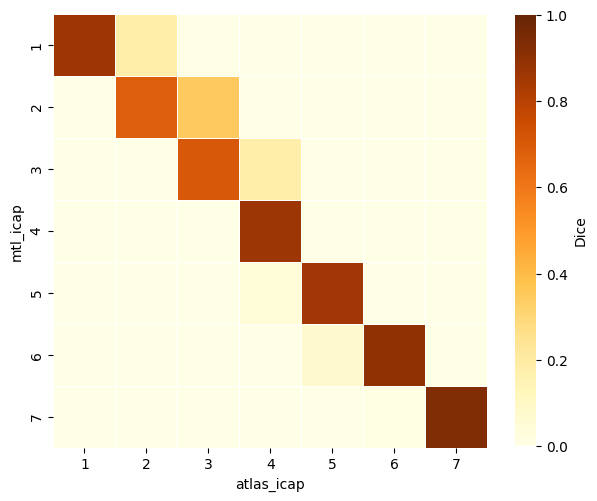

In [4]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_icap = {'k_range':range(7,8), 'dataset':'mtl', 'analysis':'icap', 'lthresh':1.6}
params_quant_atlas = {'k_range':range(7,8), 'dataset':'atlas', 'analysis':'icap', 'lthresh':1}

spine_analysis_atlas_icap_mtl = SpineOnlyAnalysis(config,params1=params_quant_icap,params2=params_quant_atlas)
#bmpd/derivatives/HealthyControls_project/hc_project_analyses/masks/spinalcord/levels/frostell/spinal_levels/K_7/com_zscored/PAM50_levels_C1toC7.nii.gz
spine_analysis_atlas_icap_mtl.spatial_similarity(k1=7,similarity_method='Dice',save_figure=True)